#House Value Predition System
#### Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:


*   Which variables are significant in predicting the price of a house, and
*   How well those variables describe the price of a house.

#### Business Goal
Build a model which will then be used by the management to understand how exactly the prices vary with the variables. So that management can manipulate the strategy of the firm and concentrate on areas that will yield high returns. Also the model will be a good way for management to understand the pricing dynamics of a new market.





### 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',80)

In [143]:
# reading the dataset
houses = pd.read_csv("train.csv")

In [144]:
print(houses.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [145]:
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [146]:
# Let us drop columns which has very few non-null values (Alley, FireplaceQu, PoolQC, Fence, MiscFeature) and also 'Id'
houses = houses.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'Id'], axis=1)

In [147]:
houses.shape

(1460, 75)

In [148]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


#### Visualising the Data
Visualise our data using matplotlib and seaborn.

Let's make a pairplot of all the numeric variables

In [149]:
# sns.pairplot(houses)
# plt.show()

Check correlations to check which variables are correlated

In [150]:
# plt.figure(figsize=(16,10))
# sns.heatmap(houses.corr(), annot=True, cmap='YlGnBu')
# plt.show()

#### Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [151]:
# Count number of zeros in all columns of Dataframe
for column_name in houses.columns:
    column = houses[column_name]
    # Get the count of Zeros in column
    count = (column == 0).sum()
    if count > 1200:
      print('#', column_name, ' : ', count)

# BsmtFinSF2  :  1293
# LowQualFinSF  :  1434
# BsmtHalfBath  :  1378
# EnclosedPorch  :  1252
# 3SsnPorch  :  1436
# ScreenPorch  :  1344
# PoolArea  :  1453
# MiscVal  :  1408


Delete variables which has mostly zeros

In [152]:
houses.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','EnclosedPorch'
,'3SsnPorch','ScreenPorch','PoolArea','MiscVal'], axis=1, inplace=True)

In [153]:
houses.shape

(1460, 67)

In [154]:
# all numeric (float and int) variables in the dataset
houses_numeric = houses.select_dtypes(include=['float64', 'int64'])
houses_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,856,856,854,1710,1,2,1,3,1,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,1262,1262,0,1262,0,2,0,3,1,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,920,920,866,1786,1,2,1,3,1,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,756,961,756,1717,1,1,0,3,1,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,1145,1145,1053,2198,1,2,1,4,1,9,1,2000.0,3,836,192,84,12,2008,250000


Numerical data seems to be having multiple categorical variables. Lets analyse non-categorical variables to start with.
As per date dictionary below variable can be treated as categorical variables.


OverallQual

OverallCond

FullBath

HalfBath

BedroomAbvGr

TotRmsAbvGrd

Fireplaces

GarageCars

MoSold

YrSold


In [155]:
houses_numeric.drop(['OverallQual','OverallCond','FullBath','HalfBath','BedroomAbvGr'
,'TotRmsAbvGrd','Fireplaces','GarageCars','MoSold','YrSold'], axis=1, inplace=True)

In [156]:
houses_numeric.isnull().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
YearBuilt         0
YearRemodAdd      0
MasVnrArea        8
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
KitchenAbvGr      0
GarageYrBlt      81
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
SalePrice         0
dtype: int64

In [157]:
houses_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   YearBuilt     1460 non-null   int64  
 4   YearRemodAdd  1460 non-null   int64  
 5   MasVnrArea    1452 non-null   float64
 6   BsmtFinSF1    1460 non-null   int64  
 7   BsmtUnfSF     1460 non-null   int64  
 8   TotalBsmtSF   1460 non-null   int64  
 9   1stFlrSF      1460 non-null   int64  
 10  2ndFlrSF      1460 non-null   int64  
 11  GrLivArea     1460 non-null   int64  
 12  BsmtFullBath  1460 non-null   int64  
 13  KitchenAbvGr  1460 non-null   int64  
 14  GarageYrBlt   1379 non-null   float64
 15  GarageArea    1460 non-null   int64  
 16  WoodDeckSF    1460 non-null   int64  
 17  OpenPorchSF   1460 non-null   int64  
 18  SalePrice     1460 non-null 

In [158]:
# correlation matrix
cor = houses_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,KitchenAbvGr,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.027850,0.040581,0.022936,-0.069836,-0.140759,-0.238518,-0.251758,0.307886,0.074853,0.003491,0.281721,0.085072,-0.098672,-0.012579,-0.006100,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.123349,0.088866,0.193458,0.233633,0.132644,0.392075,0.457181,0.080177,0.402797,0.100949,-0.006069,0.070250,0.344997,0.088521,0.151972,0.351799
LotArea,-0.139781,0.426095,1.000000,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.158155,-0.017784,-0.024947,0.180403,0.171698,0.084774,0.263843
YearBuilt,0.027850,0.123349,0.014228,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,0.010308,0.199010,0.187599,-0.174800,0.825667,0.478954,0.224880,0.188686,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,0.140024,0.287389,0.119470,-0.149598,0.642277,0.371600,0.205726,0.226298,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,0.174561,0.390857,0.085310,-0.037610,0.252691,0.373066,0.159718,0.125703,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.649212,-0.081007,0.153484,0.296970,0.204306,0.111761,0.386420
BsmtUnfSF,-0.140759,0.132644,-0.002618,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,-0.422900,0.030086,0.190708,0.183303,-0.005316,0.129005,0.214479
TotalBsmtSF,-0.238518,0.392075,0.260833,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.307351,-0.068901,0.322445,0.486665,0.232019,0.247264,0.613581
1stFlrSF,-0.251758,0.457181,0.299475,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.244671,0.068101,0.233449,0.489782,0.235459,0.211671,0.605852


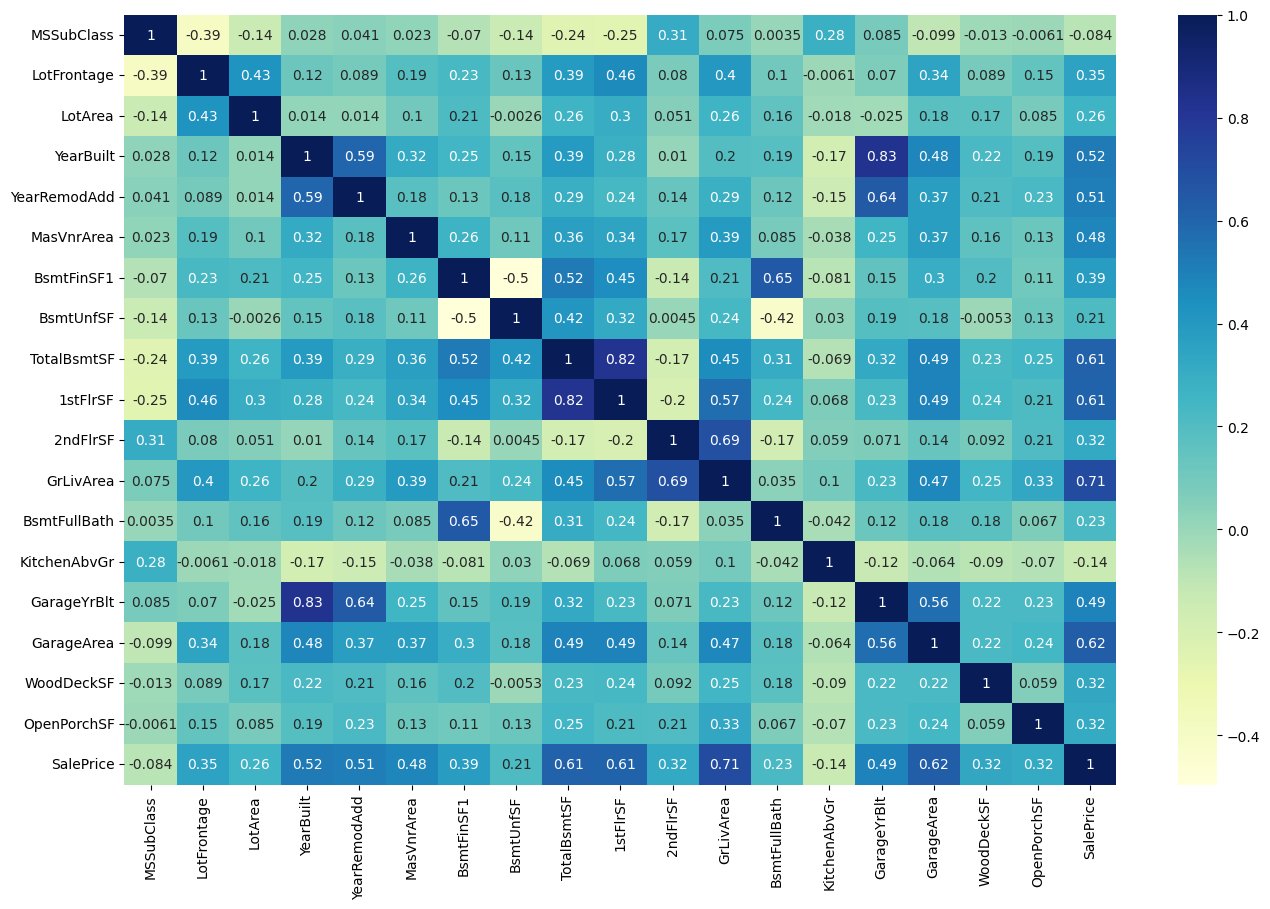

In [159]:
plt.figure(figsize=(16,10))
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

The heatmap shows some useful insights:

Correlation of price with independent variables:

Price is highly (positively) correlated with GrLivArea, GarageArea, 1stFlrSF, TotalBsmtSF, YearRemodAdd, YearBuilt

Correlation among independent variables:

Many independent variables are highly correlated.

Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

In [160]:
houses.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,12,2008,WD,Normal,250000


##Data Cleaning

Replace null values in numeric columns with some default values

In [161]:
houses.columns[houses.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [162]:
#replace nan with 0.0 for LotFrontage
houses['LotFrontage'] = houses['LotFrontage'].replace(np.nan, 0.0)
houses['MasVnrArea'] = houses['MasVnrArea'].replace(np.nan, 0.0)

In [163]:
#Fill in nan in GarageYrBlt with YearBuilt value
houses['GarageYrBlt'] = houses['GarageYrBlt'].mask(houses['GarageYrBlt'].isnull(), houses['YearBuilt'])

In [164]:
#Replace other non-numeric variables null values with default values abased on data dictionary
houses['MasVnrType'] = houses['MasVnrType'].replace(np.nan, 'None')
houses['BsmtQual'] = houses['BsmtQual'].replace(np.nan, 'NA')
houses['BsmtCond'] = houses['BsmtCond'].replace(np.nan, 'NA')
houses['BsmtExposure'] = houses['BsmtExposure'].replace(np.nan, 'NA')
houses['BsmtFinType1'] = houses['BsmtFinType1'].replace(np.nan, 'NA')
houses['BsmtFinType2'] = houses['BsmtFinType2'].replace(np.nan, 'NA')
houses['GarageType'] = houses['GarageType'].replace(np.nan, 'NA')
houses['GarageFinish'] = houses['GarageFinish'].replace(np.nan, 'NA')
houses['GarageQual'] = houses['GarageQual'].replace(np.nan, 'NA')
houses['GarageCond'] = houses['GarageCond'].replace(np.nan, 'NA')
houses['Electrical'] = houses['Electrical'].replace(np.nan, 'Mix')

## Data Preparation
Data Preparation
Let's now prepare the data and build the model.


In [165]:
# split into X and y
X = houses.drop(['SalePrice'], axis=1) # predictors in variable X

y = houses['SalePrice'] # response variable in Y

In [166]:
# creating dummy variables for categorical variables

# subset all categorical variables
houses_categorical = X.select_dtypes(include=['object'])
houses_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [167]:
# convert into dummies - one hot encoding
houses_dummies = pd.get_dummies(houses_categorical, drop_first=True)
houses_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [168]:
# drop categorical variables
X = X.drop(list(houses_categorical.columns), axis=1)

In [169]:
# concat dummy variables with X
X = pd.concat([X, houses_dummies], axis=1)

In [190]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,...,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_NA,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_NA,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.073375,0.212877,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.944591,-0.459303,-0.793434,1.161852,0.370333,1.107810,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.007405,0.311725,0.351000,-0.752176,0.216503,-1.599111,0.138777,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,0.337126,-0.02618,...,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.184376,-0.098397,-0.24236,-0.045376,0.337126,-0.156721,-0.078757,-0.24236,-0.069409,0.317893,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
1,-0.872563,0.645747,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.641228,0.466465,0.257140,-0.795163,-0.482512,-0.819964,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,-0.019300,0.311725,-0.060731,1.626195,-0.704483,-0.489110,-0.614439,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,0.760512,-0.188311,-0.159,0.337126,-0.02618,...,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.184376,-0.098397,-0.24236,-0.045376,0.337126,-0.156721,-0.078757,-0.24236,-0.069409,0.317893,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
2,0.073375,0.299451,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.301643,-0.313369,-0.627826,1.189351,0.515013,1.107810,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.931353,0.311725,0.631726,-0.752176,-0.070361,0.990891,0.138777,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,0.337126,-0.02618,...,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,0.823505,-0.114827,-0.253259,-0.078757,-0.600559,-0.24236,-0.24236,1.568348,-0.841191,-0.184376,-0.098397,-0.24236,-0.045376,0.337126,-0.156721,-0.078757,-0.24236,-0.069409,0.317893,-0.144841,0.299253,-0.052414,-0.037037,-0.078757,-0.058621,-0.058621,-0.301962,-0.045376,0.390293,-0.052414,-0.091035,-0.117851,0.467651,-0.305995
3,0.309859,0.068587,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.061670,-0.687324,-0.521734,0.937276,0.383659,1.107810,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,0.817275,1.650307,0.790804,-0.752176,-0.176048,-1.599111,-1.367655,-0.215859,-0.105263,0.518133,-0.418955,0.064238,-0.169981,-0.083045,-1.314904,-0.188311,-0.159,0.337126,-0.02618,...,-0.058621,-0.147287,-0.154412,-0.101885,-0.02618,0.271163,-1.214321,-0.114827,-0.253259,-0.078757,1.665116,-0.24236,-0.24236,-0.637614,1.188791,-0.184376,-0.098397,-0.24236,-0.045376,0.337126,-0.156721,-0

In [170]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=233)

In [171]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## Model Building and Evaluation

## Linear Regression

Let's now try predicting house prices, a dataset using linear regression.

In [172]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [173]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

179082263410417.4
[ 1.03752368e+02  9.12972600e+02  7.63892253e+03  8.82661596e+03
  6.27760011e+03  1.24280023e+04  2.73749382e+03  3.10353552e+03
  3.50564913e+03 -4.66291868e+03  1.73113828e+04  1.42482285e+04
  2.93072676e+04  1.13319131e+04  8.85216552e+02  1.09215206e+02
 -1.74498747e+03 -2.86084337e+03 -3.42879468e+03 -1.64963137e+03
  8.34963993e+02  1.01497517e+03  3.34080427e+03  1.87326507e+03
  8.89487656e+02  1.07561692e+03 -5.70465894e+02 -9.58177837e+02
  5.59157557e+03  2.80645029e+03  1.09990803e+04  7.87587578e+03
  2.04977689e+03 -2.38065508e+02  1.35440382e+02  6.09917468e+02
  4.40009270e+02 -1.37284846e+03  1.24040912e+03  8.81634702e+01
  2.17673611e+03 -1.18608008e+03  1.24220343e+02 -2.53661738e+02
  7.57931868e+02 -2.93783946e+03  6.21033405e+02  7.54727733e+02
  1.65279594e+03 -9.45973039e+02 -6.04928530e+02  4.71062805e+03
 -1.50700920e+03 -2.50370329e+02  1.15558811e+03  2.65968210e+02
 -2.59762244e+03 -1.36674091e+03  1.56188941e+03 -1.06532714e+03
  4.580

In [174]:
from sklearn.metrics import r2_score, mean_squared_error

In [175]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9476268348761886
-3.5092743982328484e+22
334177391830.3174
9.891635718736508e+34
327304007.6692629
2.2583643193462347e+32


## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [176]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low,
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [177]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}
-18631.89021691773


In [178]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-2.81410649e+03  3.07828495e+02  2.78431321e+03  8.85376351e+03
  2.77505564e+03  1.75860713e+03  3.07830155e+03  3.94335033e+03
  2.39951934e+03  9.30302426e+02  3.98051762e+03  5.59705041e+03
  5.13102392e+03  8.29552310e+03  2.53627201e+03  3.88705908e+03
  2.09650846e+03  1.84332444e+02 -1.99730712e+03  4.37205605e+03
  3.77618792e+03  1.04869263e+03  4.60389832e+03  3.33116751e+03
  1.84739772e+03  1.06667177e+03 -1.46026011e+02 -4.51967577e+02
  6.41410786e+02  1.42650142e+02  1.28362849e+03 -9.06731060e+02
  8.65312021e+02  3.73901608e+02 -2.21088212e+03 -4.31314489e+02
  1.46170700e+03  5.00497575e+02  1.47761391e+03 -6.90150558e+02
  2.20764906e+03 -1.13149022e+03 -4.92802787e+02 -3.37692529e+02
  7.11984073e+02  1.02189148e+02 -4.57936963e+01 -4.19116574e+02
  1.45164702e+02  2.32167363e+02 -1.26597734e+03  3.01672903e+03
 -2.91507401e+03 -1.40062591e+03 -7.71919884e+02 -1.02874021e+03
 -1.80043794e+03 -1.85383471e+03  1.50252327e+02 -7.51091465e+02
  6.06903230e+03  5.57380

In [179]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8833640207105398
0.8552245904027665
744219053028.091
408080261118.3218
728911903.0637522
931690093.877447


## Lasso

In [180]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso,
                        param_grid = params,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [181]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [182]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)

Lasso(alpha=500)

In [183]:
lasso.coef_

array([-6.07510075e+03, -0.00000000e+00,  3.90430085e+03,  1.34100028e+04,
        4.71306240e+03,  7.03636360e+03,  3.27610642e+03,  3.03263071e+03,
        2.37718007e+03, -0.00000000e+00,  5.33644321e+03,  0.00000000e+00,
        1.93968717e+03,  2.85667927e+04,  3.40423581e+03,  1.88523532e+03,
        0.00000000e+00, -1.43621177e+03, -2.71300702e+03,  0.00000000e+00,
        1.47847106e+03,  0.00000000e+00,  6.36407149e+03,  0.00000000e+00,
        9.31817030e+02,  3.16354006e+02, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.77338652e+03, -0.00000000e+00,
        9.81018283e+02,  0.00000000e+00, -1.56436761e+03,  0.00000000e+00,
        2.44792994e+02,  0.00000000e+00,  7.80469704e+02, -4.95086548e+02,
        2.28310259e+03, -7.01358447e+02, -1.00377527e+01,  0.00000000e+00,
        2.26487817e+01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.59654884e+02,  1.20893764e+02,  0.00000000e+00,  4.18829474e+03,
       -1.81080546e+03, -

In [184]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9233130762054743
0.8443289107406342
489316162591.3194
438792049908.6575
479251873.2530063
1001808333.1247888


In [191]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'],
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.476268e-01,8.833640e-01,9.233131e-01
1,R2 Score (Test),-3.509274e+22,8.552246e-01,8.443289e-01
2,RSS (Train),3.341774e+11,7.442191e+11,4.893162e+11
3,RSS (Test),9.891636e+34,4.080803e+11,4.387920e+11
4,MSE (Train),1.809155e+04,2.699837e+04,2.189182e+04
5,MSE (Test),1.502786e+16,3.052360e+04,3.165136e+04


## Lets observe the changes in the coefficients after regularization

In [186]:
betas = pd.DataFrame(index=X.columns)

In [187]:
betas.rows = X.columns

In [188]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [189]:
pd.set_option('display.max_rows', None)
betas.head(68)

,Linear,Ridge,Lasso
MSSubClass,103.752368,-2814.106489,-6075.100746
LotFrontage,912.972600,307.828495,-0.000000
LotArea,7638.922526,2784.313209,3904.300852
OverallQual,8826.615964,8853.763505,13410.002847
OverallCond,6277.600113,2775.055635,4713.062403
YearBuilt,12428.002258,1758.607134,7036.363597
YearRemodAdd,2737.493818,3078.301547,3276.106418
MasVnrArea,3103.535523,3943.350333,3032.630706
BsmtFinSF1,3505.649126,2399.519336,2377.180074
BsmtUnfSF,-4662.918676,930.302426,-0.000000
